In [141]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [143]:
df=pd.read_csv('/content/drive/MyDrive/elevvo/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [145]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [146]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [147]:
df = df.drop("customerID", axis = 1)

In [148]:

for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: gender
['Female' 'Male']

Column: SeniorCitizen
[0 1]

Column: Partner
['Yes' 'No']

Column: Dependents
['No' 'Yes']

Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
['No' 'Yes']

Column: MultipleLines
['No phone service' 'No' 'Yes']

Column: InternetService
['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
['No' 'Yes' 'No internet service']

Column: OnlineBackup
['Yes' 'No' 'No internet service']

Column: DeviceProtection
['No' 'Yes' 'No internet service']

Column: TechSupport
['No' 'Yes' 'No internet service']

Column: StreamingTV
['No' 'Yes' 'No internet service']

Column: StreamingMovies
['No' 'Yes' 'No internet service']

Column: Contract
['Month-to-month' 'One year' 'Two year']

Column: PaperlessBilling
['Yes' 'No']

Column: PaymentMethod
['Electronic check' 'M

In [149]:
df['Churn'].value_counts().to_frame()

,count
Churn,
No,5174
Yes,1869


In [150]:
df.shape

(7043, 20)

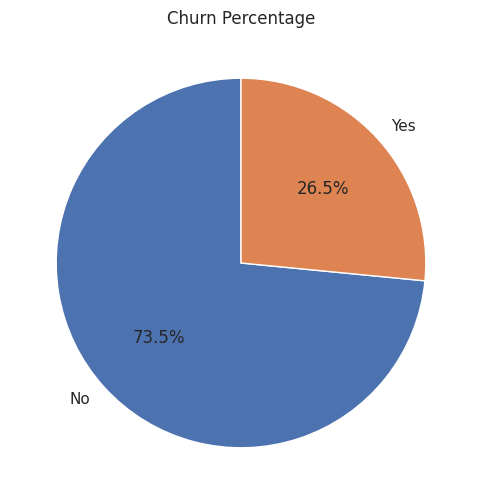

In [151]:
churn_rate = df["Churn"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    churn_rate,
    labels=churn_rate.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Churn Percentage")
plt.show()

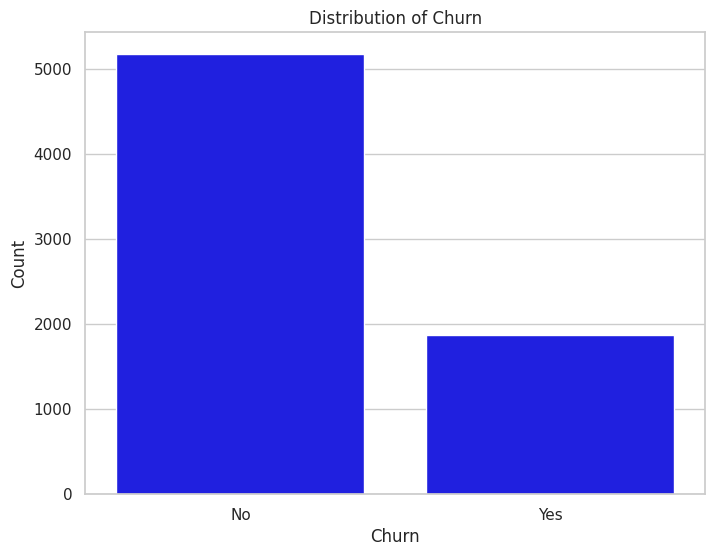

In [152]:
plt.figure(figsize=(8,6))
sns.countplot(x="Churn", data=df, color="blue")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")
plt.show()

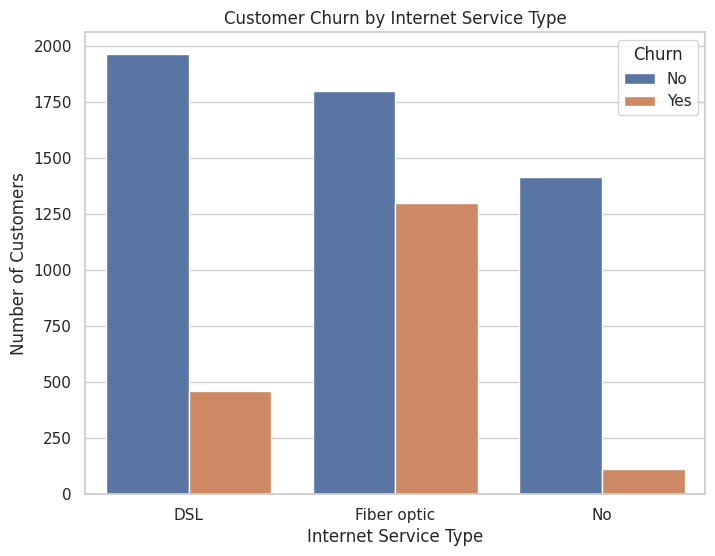

In [153]:
plt.figure(figsize=(8,6))
sns.countplot(x="InternetService", hue="Churn", data=df)
plt.title("Customer Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.show()

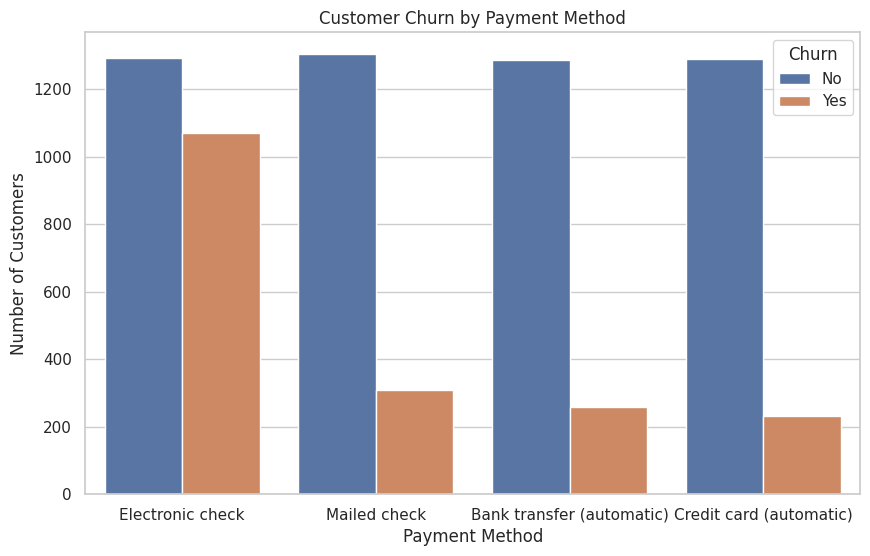

In [154]:
plt.figure(figsize=(10,6))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)
plt.title("Customer Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()

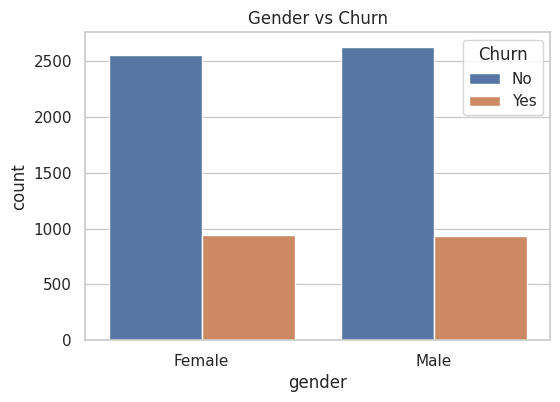

In [155]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", hue="Churn", data=df)
plt.title("Gender vs Churn")
plt.show()

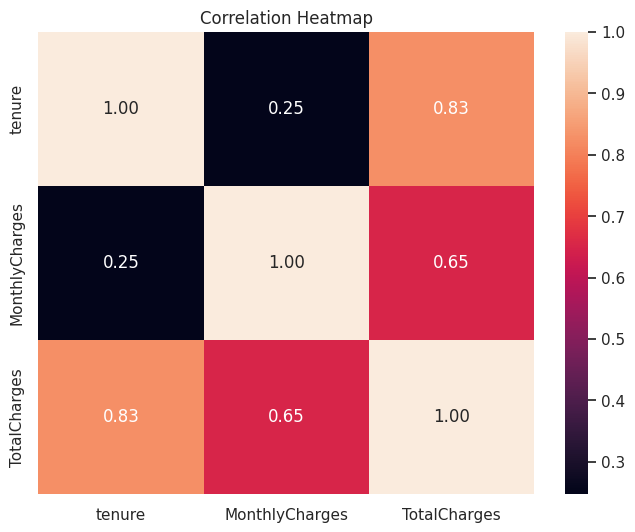

In [156]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

plt.figure(figsize = (8, 6))
sns.color_palette("Spectral", as_cmap=True)
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot = True, fmt = ".2f" )
plt.title(f"Correlation Heatmap")
plt.show()

In [157]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [158]:
categorical_cols = X.select_dtypes(include="object").columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)

Numeric: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

In [160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Model: Logistic Regression
Accuracy: 0.8218594748048261
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



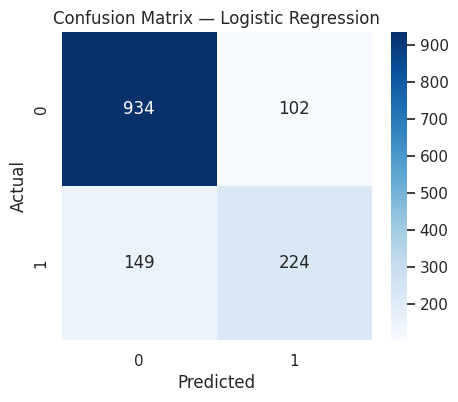

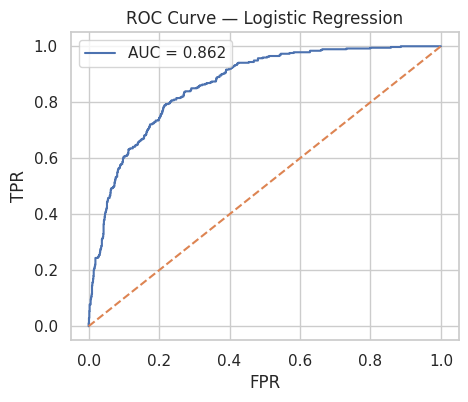


Model: Decision Tree
Accuracy: 0.7189496096522356
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.64      0.65      0.64      1409
weighted avg       0.72      0.72      0.72      1409



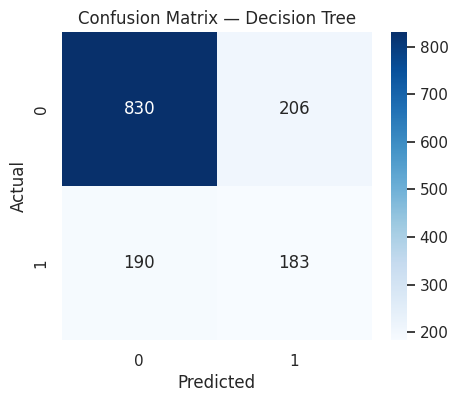

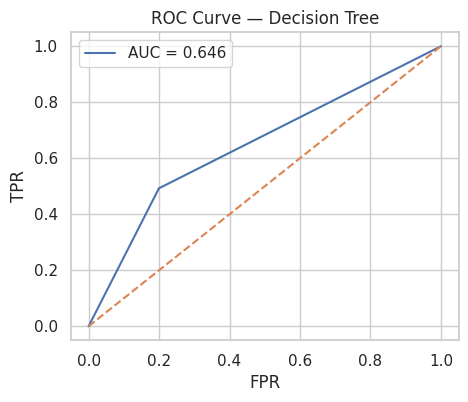


Model: KNN
Accuracy: 0.7743080198722498
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.58      0.55      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.77      0.77      0.77      1409



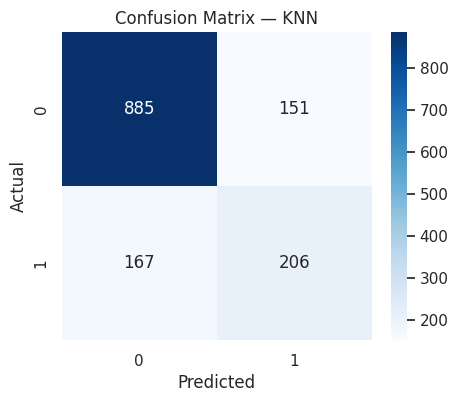

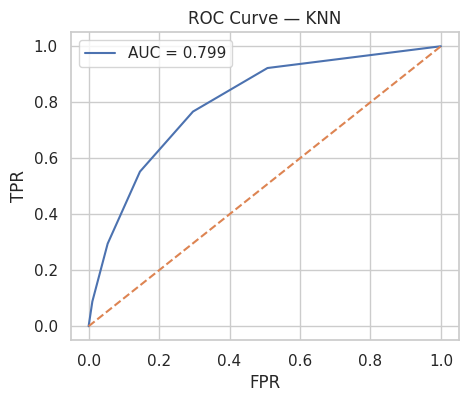


Model: Random Forest
Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



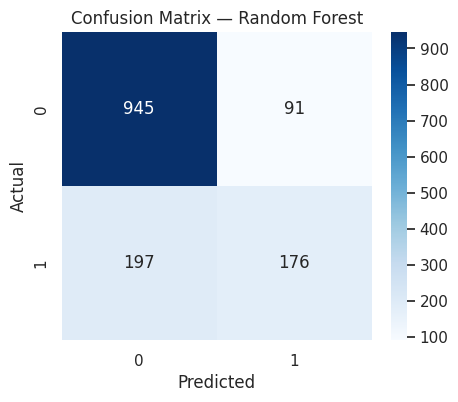

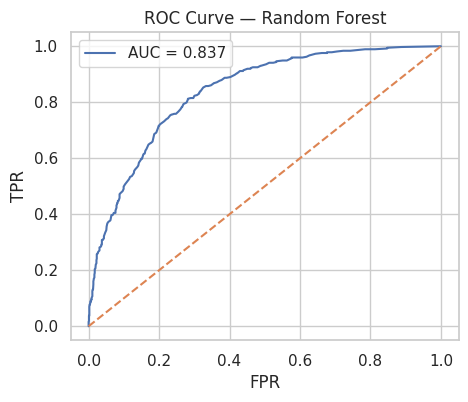


Model: SVM
Accuracy: 0.8097941802696949
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



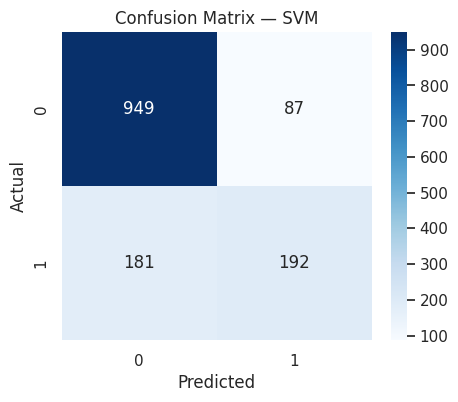

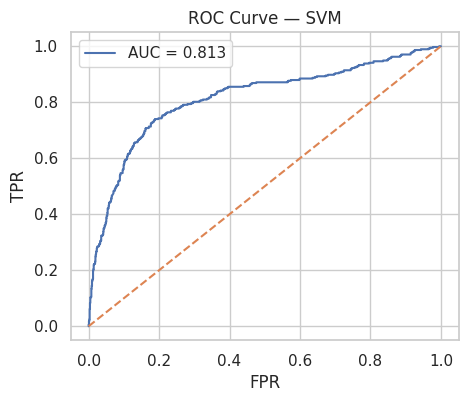


Model: XGBoost
Accuracy: 0.7877927608232789
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.51      0.56       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



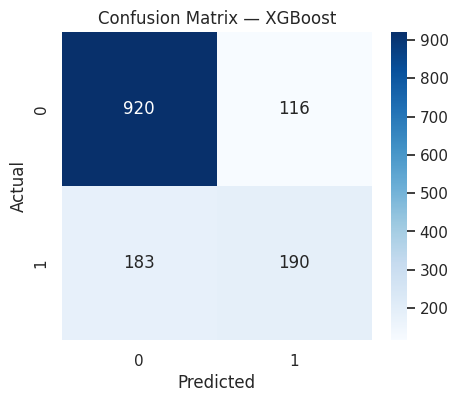

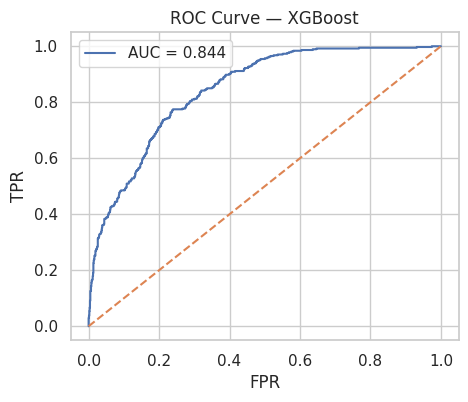


===== MODEL COMPARISON =====
Logistic Regression: 0.8219
Decision Tree: 0.7189
KNN: 0.7743
Random Forest: 0.7956
SVM: 0.8098
XGBoost: 0.7878


In [161]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}


results = {}

for name, clf in models.items():

    print("\n==============================")
    print("Model:", name)
    print("==============================")

    pipeline = Pipeline([
        ("prep", preprocessor),
        ("model", clf)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],"--")
    plt.title(f"ROC Curve — {name}")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()


print("\n===== MODEL COMPARISON =====")
for k,v in results.items():
    print(f"{k}: {v:.4f}")

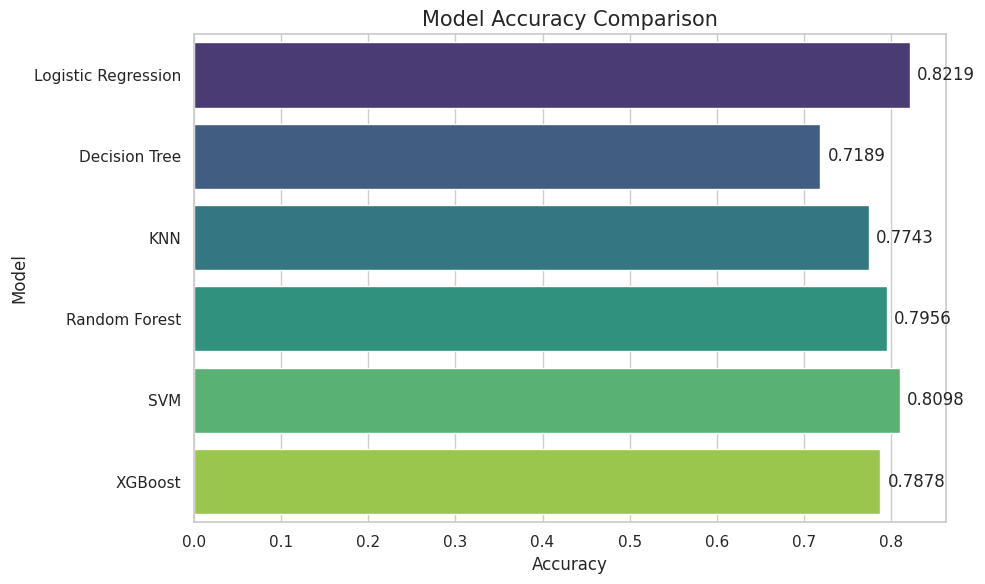

In [162]:
# Set the visual style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a DataFrame from the results for plotting
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])

# Create the barplot
ax = sns.barplot(x="Accuracy", y="Model", data=df_results, palette="viridis", hue="Model", legend=False)

# Add titles and labels
plt.title("Model Accuracy Comparison", fontsize=15)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)

# Add the actual score labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.4f', padding=5)

plt.tight_layout()
plt.show()

In [163]:
df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"]).sort_values(
    by="Accuracy", ascending=False
)

df

,Model,Accuracy
0,Logistic Regression,0.821859
4,SVM,0.809794
3,Random Forest,0.795600
5,XGBoost,0.787793
2,KNN,0.774308
1,Decision Tree,0.718950


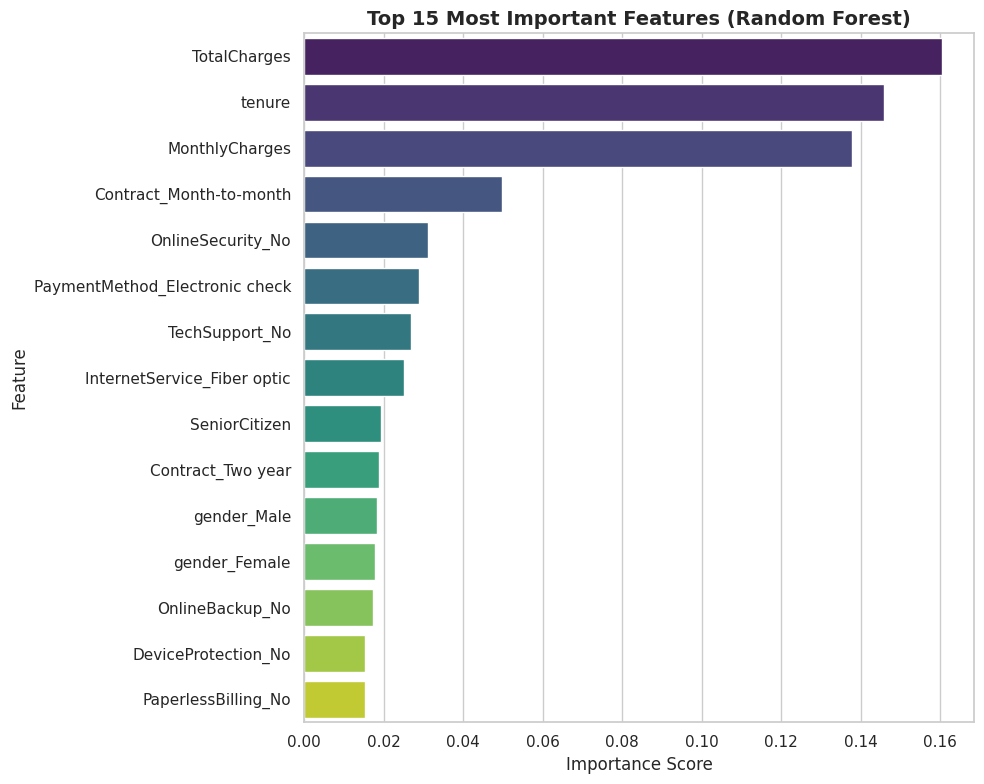


Top 10 Most Important Features:
                       Feature  Importance
                  TotalCharges    0.160451
                        tenure    0.145715
                MonthlyCharges    0.137741
       Contract_Month-to-month    0.049752
             OnlineSecurity_No    0.031017
PaymentMethod_Electronic check    0.028834
                TechSupport_No    0.026936
   InternetService_Fiber optic    0.025166
                 SeniorCitizen    0.019256
             Contract_Two year    0.018844


In [164]:
# Create and fit a pipeline specifically for the Random Forest model
rf_pipeline = Pipeline([
    ("prep", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42)) # Added random_state for reproducibility
])
rf_pipeline.fit(X_train, y_train)

# Access the trained Random Forest model from the pipeline
rf_model = rf_pipeline['model']

# Get feature names after preprocessing
numerical_features_after_prep = numerical_cols.tolist()
categorical_features_after_prep = rf_pipeline.named_steps['prep'].named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
all_features_after_prep = numerical_features_after_prep + categorical_features_after_prep

feature_importance = pd.DataFrame({
    'Feature': all_features_after_prep,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance, y='Feature', x='Importance', palette='viridis', hue='Feature', legend=False)
plt.title('Top 15 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))

In [165]:
# Logistic Regression predictions
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]



In [166]:
sample_df = X_test.copy()

sample_df['Actual'] = y_test

sample_df['LR_Predicted'] = y_test_pred
sample_df['LR_Probability'] = y_test_prob

display(sample_df.head(10))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual,LR_Predicted,LR_Probability
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,...,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,1,1,0.789584
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,0,0,0.155382
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70,0,0,0.007608
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,No,Electronic check,76.35,76.35,1,1,0.951729
132,Male,0,No,No,67,Yes,No,DSL,No,No,...,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10,0,0,0.000852
1263,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Month-to-month,Yes,Bank transfer (automatic),89.60,6127.60,1,0,0.068031
3732,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,No,...,Yes,No,Two year,Yes,Bank transfer (automatic),77.15,1759.40,0,0,0.003401
1672,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,...,No,No,Two year,No,Credit card (automatic),72.10,5016.65,0,0,0.000832
811,Male,0,No,No,70,Yes,Yes,Fiber optic,Yes,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),104.00,7250.15,1,0,0.207015
2526,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19.40,19.40,1,0,0.339461


In [167]:
import joblib

# Assuming 'trained_models' dictionary contains the fitted pipelines
# The key for Logistic Regression is 'Logistic Regression'
log_model = trained_models['Logistic Regression']

joblib.dump(log_model, "churn_model.pkl")

['churn_model.pkl']